#Integrantes:
#Marco Antonio Arenas Ramírez                          Código 2241008
#Carlos Gálvez 				             Código 2160159

# **PUNTO 1. Notebook de Limpieza y Visualización de Datos (Limpieza_de_datos.ipynb):**

#Proyecto recomendacion  numeros a apostar

OBJETIVO DEL PROYECTO: Desarrollar una solución de datos que permita extraer, transformar, almacenar y monitorear datos en tiempo real para generar valor a un usuario en un contexto, donde los datos sean adquiridos desde la fuente real y desde las diferentes bases de datos de información.

Se selecciona un conjunto de datos de información de Apuestas de la empresa Red de Servicios de Occidente S.A del Departamento del Chocó con un rango de fechas del 01 al 31 de Enero del 2024. Cabe resaltar que la información es pública y no expone datos sensibles de clientes o financieros de la compañía.

El conjunto de datos son extraídos de un motor relacional Oracle con una cantidad de 23.080 registros que indican los números apostados por fecha, hora, municipio, línea de producto, lotería, modalidad, valorapostado y datos del cliente que los compró como su edad y genero (Cliente Oculto).


Contexto: es necesario aclarar ya que talvez no todas las personas conozcan como funciona el apostar  o jugar chance

Primero el apostador escoge números con varias modalidades de chance y sus derivados, sobre ese numero se apuesta una cantidad  de dinero en diferentes modalidades de juego  entre las dos mas conocidas son  chance y doblechance.

- **Chance:** este es modo de juego normal  en donde el apostador escoge un numero o varios y decide apostar por una loteria o varias loterias y gana en caso de  que el numero apostado salga con alguna loteria tambien apostada

ejemplo: si alguien apuesta 1000 pesos colombianos al numero 2032  y apuesta  con la loteria del valle y tambien con la loteria de manizales que juegan el mismo dia  el valor total apagar serian 2000 ya que los mil pesos se apuestan a una loteria y los otros van con la otra loteria. En este caso de analisis solo se le apuesta a una loteria asi que es mas entendible los datos sin  que podamos sufrir confuciones con los modo de juegos


- **Doble chance:** este de modo es diferente al anterior en donde el apostador escoge 5 numeros 3 o 4 cifras y escoge dos loterias. la persona gana si 2 de los 5 numeros apostados salen con las loterias escogidas.

ejemplo:si alguien escoge 5 numeros de 4 cifras y dos loterias, el valor monetario seria de 3000 pesos colombianos  ya que este modo tiene precios fijos 2000 para numeros de 3 cifras y 3000 para numero de 4 cifras. La logica dice que es mas dificil ganar este tipo de juego ya que debes acertar 2 veces pero tambien  el premio es mucho mayor en caso de numeros de 3 cifras el valor incial del acumulado es de 18 millones y para numeros de 4 cifras es de 400 millones

**Chance Millonario** Es el mismo Doble Chance pero Nacional

**Super Chance** es una modalidad de juego en la que el apostador realiza una apuesta mínima de $500 y máxima de $10.000, debe ser un número de cuatro (4) cifras más un quinto (5) número que corresponde al último de la serie o puede elegir jugar el quinto dígito con todos los números del 0 al 9 para aumentar las probabilidades de ganar.

Para ganar el Super Chance debe acertar tus 4 números como premio mayor de la lotería y el quinto número debe corresponder al último dígito de la serie de la misma lotería.

Entre semana en el día juega con Chonto día, donde la quinta cifra se obtiene del ultimo dígito del sorteo de Paisita día y en la noche juega con las loterías principales del día; Los fines de semana y festivos juega con Chonto noche y la quinta cifra se obtiene del ultimo dígito del sorteo de Paisita noche.

Adicionalmente, el jugador recibirá una apuesta de chance tradicional de 4 cifras de $10 con el número, sorteo o lotería que elija, el cual juega el mismo día que se realiza la apuesta del Super chance.

**Pagamas** Paga más es una modalidad de juego en la cual, el apostador puede escoger un número de (3) tres o (4) cuatro cifras.

Juega de lunes a domingo con cualquier lotería o sorteo autorizado; En caso de que el apostador acierte el número escogido con el sorteo o lotería principal apostada disfrutará de un premio neto.



In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se cargan los datos del CSV
df = pd.read_csv("/content/datos_apuestas.csv")

* Exploración de Data

In [59]:
df.head()

,MES,DIA,HORA,DANE,TIPOJUEGO,NOMBRE_LOTERIA,NOMBRE_MODALIDAD,NUMEROAPOSTADO,EDAD,GENERO,GANADOR,VALORAPOSTADO
0,Enero,30,06:58:58,Nóvita,chance,HUILA,CUATRO CIFRAS DIRECTO,RES: 3333,59,F,no,60
1,Enero,30,06:58:58,Nóvita,chance,HUILA,CUATRO CIFRAS DIRECTO,RES: 9999,59,F,no,60
2,Enero,30,06:28:04,Quibdó,DOBLEACIERTO 4C 1000,CAFETERO DIA,DOBLEACIERTO 4CIF 1000,RES: 1270,44,M,no,100
3,Enero,30,06:28:04,Quibdó,DOBLEACIERTO 4C 1000,CAFETERO DIA,DOBLEACIERTO 4CIF 1000,RES: 1701,44,M,no,100
4,Enero,30,06:28:04,Quibdó,DOBLEACIERTO 4C 1000,CAFETERO DIA,DOBLEACIERTO 4CIF 1000,RES: 2009,44,M,no,100


Como primer paso quiero saber cuantos parametros tiene la base de datos y de que tipos son las varibles  ademas saber si hay valores nulos o valores repetidos

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23080 entries, 0 to 23079
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MES               23080 non-null  object
 1   DIA               23080 non-null  int64 
 2   HORA              23080 non-null  object
 3   DANE              23080 non-null  object
 4   TIPOJUEGO         23080 non-null  object
 5   NOMBRE_LOTERIA    23080 non-null  object
 6   NOMBRE_MODALIDAD  23080 non-null  object
 7   NUMEROAPOSTADO    23080 non-null  object
 8   EDAD              23080 non-null  int64 
 9   GENERO            23080 non-null  object
 10  GANADOR           23080 non-null  object
 11  VALORAPOSTADO     23080 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 2.1+ MB


a primera vista tenemos 12 columnas  en donde no tenemos datos faltantes  y las clases en su mayoria estan corectas excepto por numero apostado que en nuestra opinion deberia ser numerico pero eso lo profundizaremos mas adelante

In [61]:
df.isna().sum()

MES                 0
DIA                 0
HORA                0
DANE                0
TIPOJUEGO           0
NOMBRE_LOTERIA      0
NOMBRE_MODALIDAD    0
NUMEROAPOSTADO      0
EDAD                0
GENERO              0
GANADOR             0
VALORAPOSTADO       0
dtype: int64

In [62]:
duplicados=df.duplicated()
duplicados.value_counts()

False    22828
True       252
Name: count, dtype: int64

* Limpieza de Datos

En la celda anterior nos damos cuenta que hay 252 valores duplicados en este caso se deciden eliminar  para que el analisis de los se lo mas limpio posible.

**Elimino datos duplicados**

In [63]:
df.drop_duplicates(keep="first",inplace=True)
duplicados=df.duplicated()
duplicados.value_counts()

False    22828
Name: count, dtype: int64

Se realiza una exploración de la columna TIPOJUEGO donde encontramos una buena cantidad de muestra por cada una de ellas y conocer cuales son las lineas de negocio que estan disponibles en el DataSet para la muestra que nos permitirá analizar sus comportamientos en los numeros y valores apostados

In [64]:
col1_values=df["TIPOJUEGO"].value_counts()
print(col1_values)

TIPOJUEGO
chance                          14215
CHANCE                           6510
PAGAMAS                           447
DOBLEACIERTO 3C 1000              395
DOBLEACIERTO 4C 1000              340
DOBLEACIERTO 4C 2500              325
DOBLEACIERTO 3C 2500              285
Chance                            151
CHANCE MILLONARIO 4CF             140
CHANCE INCENTIVO SUPERCHANCE       10
SUPERCHANCE                        10
Name: count, dtype: int64


Se realiza una exploración de la columna NOMBRE_LOTERIA donde encontramos una buena cantidad de muestra por cada una de ellas y conocer cuales Loterias estan disponibles en el DataSet para la muestra que nos permitirá analizar sus comportamientos en los numeros y valores apostados

In [65]:
col1_values=df["NOMBRE_LOTERIA"].value_counts()
print(col1_values)

NOMBRE_LOTERIA
CRUZ ROJA       6673
HUILA           5947
PIJAO           3192
CHONTICO DIA    1662
DORADO TARDE    1604
CULONA DIA      1600
CAFETERO DIA    1471
CUNDINAMARCA     359
TOLIMA           320
Name: count, dtype: int64


Se realiza una exploración de la columna NOMBRE_MODALIDAD donde encontramos una buena cantidad de muestra por cada una de ellas y conocer cuales modalidades estan disponibles en el DataSet para la muestra que nos permitirá analizar sus comportamientos en los numeros y valores apostados

In [66]:
col1_values=df["NOMBRE_MODALIDAD"].value_counts()
print(col1_values)

NOMBRE_MODALIDAD
CUATRO CIFRAS DIRECTO       12122
TRES CIFRAS DIRECTO          3504
tres cifras directo          2438
cuatro cifras directo        2093
DOS ULTIMAS CIFRAS            499
DOBLEACIERTO 3CIF 1000        395
DOBLEACIERTO 4CIF 1000        340
DOBLEACIERTO 4CIF 2500        325
DOBLEACIERTO 3CIF 2500        285
PAGAMAS 2000                  271
CHANCE MILLONARIO 4CF         140
PAGAMAS 1500                  132
CUATRO CIFRAS COMBINADO        85
TRES CIFRAS COMBINADO          69
Cuatro Cifras Combinado        66
PAGAMAS 3000                   24
PAGAMAS 5000                   11
INCENTIVO 4C SUPERCHANCE       10
PAGAMAS 10000                   8
SUPERCHANCE                     8
SUPERCHANCE TODOS               2
PAGAMAS 20000                   1
Name: count, dtype: int64


Se consultan las variables categoricas para conocer si existen datos para corregir

In [67]:
for column in df.select_dtypes(include=['object']).columns:
    print(column, ":", df[column].unique())

MES : ['Enero     ']
HORA : ['06:58:58' '06:28:04' '06:28:18' ... '10:05:09' '10:18:08' '10:55:00']
DANE : ['Nóvita' 'Quibdó' 'Riosucio' 'Condoto' 'Unguía' 'Tadó' 'Istmina' 'Acandí'
 'Bahía Solano' 'El Litoral De San Juan' 'Carmen Del Darién' 'Bojayá'
 'Medio San Juan' 'Alto Baudó' 'Uníon Panamericana' 'Medio Baudó'
 'Carmen De Atrato' 'Cértegui' 'Río Iró']
TIPOJUEGO : ['chance' 'DOBLEACIERTO 4C 1000' 'DOBLEACIERTO 4C 2500'
 'DOBLEACIERTO 3C 2500' 'DOBLEACIERTO 3C 1000' 'CHANCE' 'PAGAMAS' 'Chance'
 'CHANCE MILLONARIO 4CF' 'CHANCE INCENTIVO SUPERCHANCE' 'SUPERCHANCE']
NOMBRE_LOTERIA : ['HUILA' 'CAFETERO DIA' 'CHONTICO DIA' 'PIJAO' 'CRUZ ROJA' 'DORADO TARDE'
 'CULONA DIA' 'CUNDINAMARCA' 'TOLIMA']
NOMBRE_MODALIDAD : ['CUATRO CIFRAS DIRECTO' 'DOBLEACIERTO 4CIF 1000' 'DOBLEACIERTO 4CIF 2500'
 'cuatro cifras directo' 'DOBLEACIERTO 3CIF 2500' 'DOBLEACIERTO 3CIF 1000'
 'tres cifras directo' 'TRES CIFRAS DIRECTO' 'PAGAMAS 2000' 'PAGAMAS 3000'
 'Cuatro Cifras Combinado' 'DOS ULTIMAS CIFRAS' 'PAG

Se dejan los datos en minuscula para estandarizar los datos y se arreglan los numeros apostados eliminando los primeros caraceteres para que queden solo los números

In [68]:
df['TIPOJUEGO'] = df['TIPOJUEGO'].str.lower().str.strip()
df['MES'] = df['MES'].str.lower().str.strip()
df['DANE'] = df['DANE'].str.lower().str.strip()
df['TIPOJUEGO'] = df['TIPOJUEGO'].str.lower().str.strip()
df['NOMBRE_LOTERIA'] = df['NOMBRE_LOTERIA'].str.lower().str.strip()
df['NOMBRE_MODALIDAD'] = df['NOMBRE_MODALIDAD'].str.lower().str.strip()
df['GENERO'] = df['GENERO'].str.lower().str.strip()
df['NUMEROAPOSTADO'] = df['NUMEROAPOSTADO'].str.split(': ').str[-1]




In [69]:
for column in df.select_dtypes(include=['object']).columns:
    print(column, ":", df[column].unique())

MES : ['enero']
HORA : ['06:58:58' '06:28:04' '06:28:18' ... '10:05:09' '10:18:08' '10:55:00']
DANE : ['nóvita' 'quibdó' 'riosucio' 'condoto' 'unguía' 'tadó' 'istmina' 'acandí'
 'bahía solano' 'el litoral de san juan' 'carmen del darién' 'bojayá'
 'medio san juan' 'alto baudó' 'uníon panamericana' 'medio baudó'
 'carmen de atrato' 'cértegui' 'río iró']
TIPOJUEGO : ['chance' 'dobleacierto 4c 1000' 'dobleacierto 4c 2500'
 'dobleacierto 3c 2500' 'dobleacierto 3c 1000' 'pagamas'
 'chance millonario 4cf' 'chance incentivo superchance' 'superchance']
NOMBRE_LOTERIA : ['huila' 'cafetero dia' 'chontico dia' 'pijao' 'cruz roja' 'dorado tarde'
 'culona dia' 'cundinamarca' 'tolima']
NOMBRE_MODALIDAD : ['cuatro cifras directo' 'dobleacierto 4cif 1000' 'dobleacierto 4cif 2500'
 'dobleacierto 3cif 2500' 'dobleacierto 3cif 1000' 'tres cifras directo'
 'pagamas 2000' 'pagamas 3000' 'cuatro cifras combinado'
 'dos ultimas cifras' 'pagamas 1500' 'pagamas 5000'
 'chance millonario 4cf' 'pagamas 10000' 't

Se genera una nueva columna en el DataSet llamada JORNADA, esta columna permite determinar partiendo de la HORA deducir por mañana, tarde y noche las jornadas de numeros y valores apostados por clientes.

In [70]:
df['HORA'] = pd.to_datetime(df['HORA'])

# Definir los intervalos de tiempo para cada jornada
mañana_inicio = pd.to_datetime('06:00:00').time()
tarde_inicio = pd.to_datetime('12:00:00').time()
noche_inicio = pd.to_datetime('18:00:00').time()

# Función para asignar la jornada correspondiente
def asignar_jornada(hora):
    if hora.time() < tarde_inicio:
        return 'Mañana'
    elif tarde_inicio <= hora.time() < noche_inicio:
        return 'Tarde'
    else:
        return 'Noche'

# Aplicar la función para crear la nueva columna 'JORNADA'
df['JORNADA'] = df['HORA'].apply(asignar_jornada)

# Visualizar el DataFrame con la nueva columna 'JORNADA'

col1_values=df["JORNADA"].value_counts()
print(col1_values)

JORNADA
Mañana    8766
Tarde     8395
Noche     5667
Name: count, dtype: int64


<ipython-input-70-42a414a64632>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HORA'] = pd.to_datetime(df['HORA'])


Se eliminan del dataset las columnas HORA y GANADOR ya que se determina que para el analisis no las requerimos, la columna HORA se fusiona con la nueva columna JORNADA y la de GANADOR vemos que son muy pocos los registros con SI Ganadores

In [71]:
del df['HORA']
del df['GANADOR']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22828 entries, 0 to 23079
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MES               22828 non-null  object
 1   DIA               22828 non-null  int64 
 2   DANE              22828 non-null  object
 3   TIPOJUEGO         22828 non-null  object
 4   NOMBRE_LOTERIA    22828 non-null  object
 5   NOMBRE_MODALIDAD  22828 non-null  object
 6   NUMEROAPOSTADO    22828 non-null  object
 7   EDAD              22828 non-null  int64 
 8   GENERO            22828 non-null  object
 9   VALORAPOSTADO     22828 non-null  int64 
 10  JORNADA           22828 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.1+ MB


In [72]:
df.head()

,MES,DIA,DANE,TIPOJUEGO,NOMBRE_LOTERIA,NOMBRE_MODALIDAD,NUMEROAPOSTADO,EDAD,GENERO,VALORAPOSTADO,JORNADA
0,enero,30,nóvita,chance,huila,cuatro cifras directo,3333,59,f,60,Mañana
1,enero,30,nóvita,chance,huila,cuatro cifras directo,9999,59,f,60,Mañana
2,enero,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,1270,44,m,100,Mañana
3,enero,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,1701,44,m,100,Mañana
4,enero,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,2009,44,m,100,Mañana


Se convierten los datos de la variable MES por posición del mes en calendario rango de 1 a 12

In [73]:
meses_numeros = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

# Aplicar la transformación a la columna "MES"
df['MES'] = df['MES'].map(meses_numeros)
df['MES'] = (df['MES']).astype('str')
# Mostrar los primeros registros para verificar el cambio
print(df.head())

  MES  DIA    DANE             TIPOJUEGO NOMBRE_LOTERIA  \
0   1   30  nóvita                chance          huila   
1   1   30  nóvita                chance          huila   
2   1   30  quibdó  dobleacierto 4c 1000   cafetero dia   
3   1   30  quibdó  dobleacierto 4c 1000   cafetero dia   
4   1   30  quibdó  dobleacierto 4c 1000   cafetero dia   

         NOMBRE_MODALIDAD NUMEROAPOSTADO  EDAD GENERO  VALORAPOSTADO JORNADA  
0   cuatro cifras directo           3333    59      f             60  Mañana  
1   cuatro cifras directo           9999    59      f             60  Mañana  
2  dobleacierto 4cif 1000           1270    44      m            100  Mañana  
3  dobleacierto 4cif 1000           1701    44      m            100  Mañana  
4  dobleacierto 4cif 1000           2009    44      m            100  Mañana  


A continuacion vemos  el grfico de como estan distribuido los datos por la jorna en la cual se hacen las apuestas  esto con el fin de visualizar  y sacar supociciones

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22828 entries, 0 to 23079
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MES               22828 non-null  object
 1   DIA               22828 non-null  int64 
 2   DANE              22828 non-null  object
 3   TIPOJUEGO         22828 non-null  object
 4   NOMBRE_LOTERIA    22828 non-null  object
 5   NOMBRE_MODALIDAD  22828 non-null  object
 6   NUMEROAPOSTADO    22828 non-null  object
 7   EDAD              22828 non-null  int64 
 8   GENERO            22828 non-null  object
 9   VALORAPOSTADO     22828 non-null  int64 
 10  JORNADA           22828 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.1+ MB


* Incluir al menos 5 visualizaciones (maneje una paleta de colores para ello), como gráficos
de barras, diagramas de tortas, series de tiempo, entre otros.

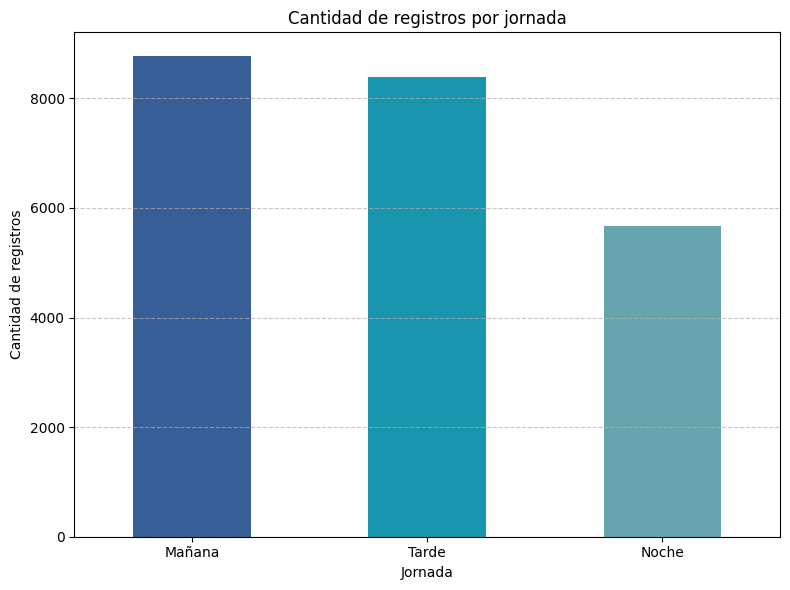

In [74]:
conteo_jornadas = df['JORNADA'].value_counts()
Supergiros_palette=["#375E97","#1995AD","#66A5AD","#C4DFE6"]

plt.figure(figsize=(8, 6))

conteo_jornadas.plot(kind='bar', color=Supergiros_palette)

plt.title('Cantidad de registros por jornada')
plt.xlabel('Jornada')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

en este grafico vemos como hay una tendencia a jugar en la mañana y tarde esto nos puede dar informacion sobre que loterias  y que modos de juegos son  mas preferidos por la poblacion analizada.

Realizamos una matriz de correlacion y asi mirar que  tan relacionada estan los parametros  numericos


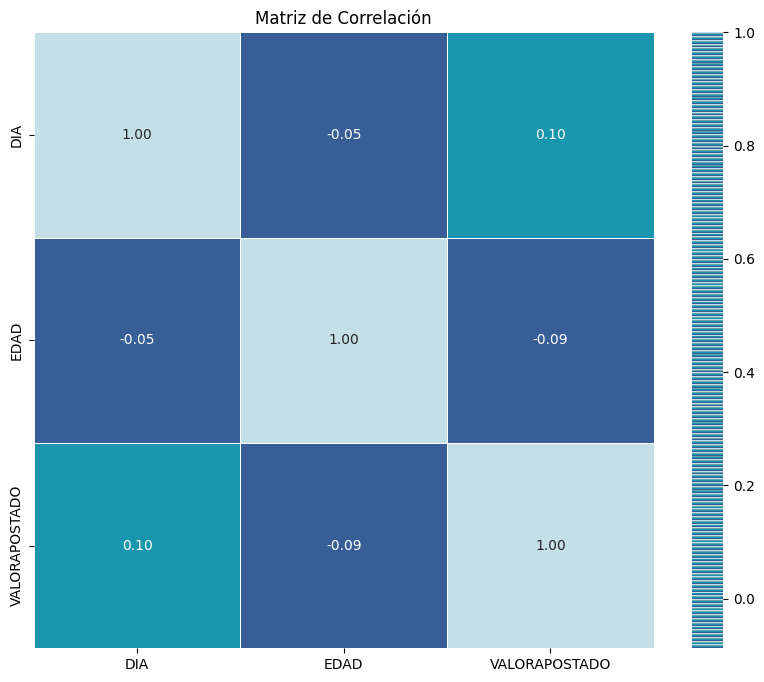

In [78]:
from itertools import cycle, islice
df1=df[["DIA","EDAD","VALORAPOSTADO"]]
my_colors = list(islice(cycle(["#375E97","#1995AD","#66A5AD","#C4DFE6"]), None, len(df)))

plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap=my_colors, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

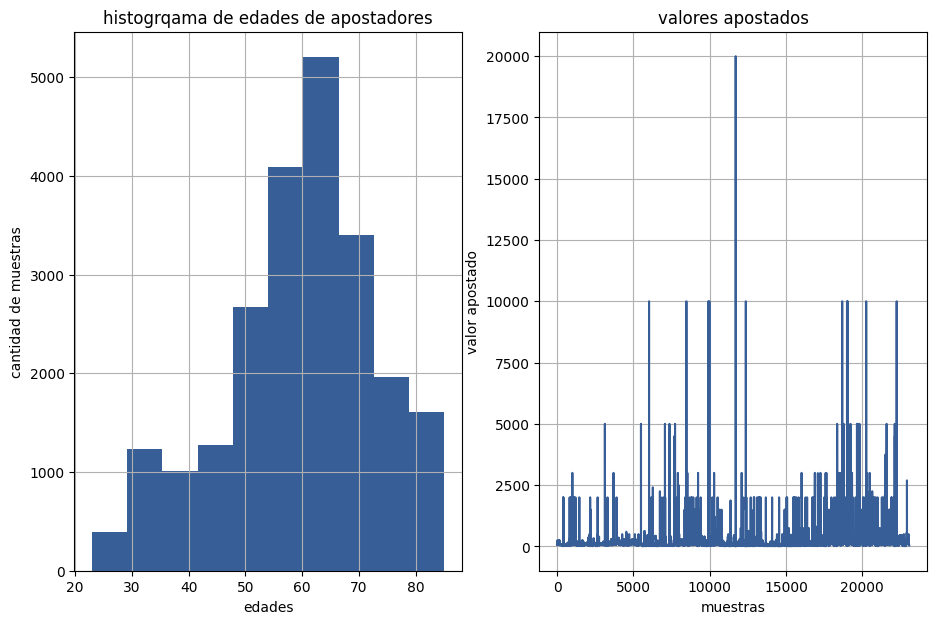

In [20]:
plt.figure(figsize=(17,7))
plt.subplot(131)
plt.hist(df["EDAD"],color="#375E97")
plt.title("histogrqama de edades de apostadores")
plt.ylabel("cantidad de muestras")
plt.xlabel("edades")
plt.grid(True)
plt.subplot(132)
plt.plot(df["VALORAPOSTADO"],color="#375E97")
plt.title("valores apostados")
plt.ylabel("valor apostado")
plt.xlabel("muestras")
plt.grid(True)
plt.show()

ahora desamos ver si existen valores atipicos dentro de las variables numericas y en tal caso tomar las acciones pertinentes

<ipython-input-21-06875a826d85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df["EDAD"],palette=Supergiros_palette)
<ipython-input-21-06875a826d85>:3: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.boxplot(df["EDAD"],palette=Supergiros_palette)
<ipython-input-21-06875a826d85>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df["VALORAPOSTADO"],palette=Supergiros_palette)
<ipython-input-21-06875a826d85>:7: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.boxplot(df["VALORAPOSTADO"],palette=Supergiros_palette)
<ipython-input-21-06875a826d85>:11: FutureWarning: 

Passing `palette` witho

Text(0, 0.5, 'dias')

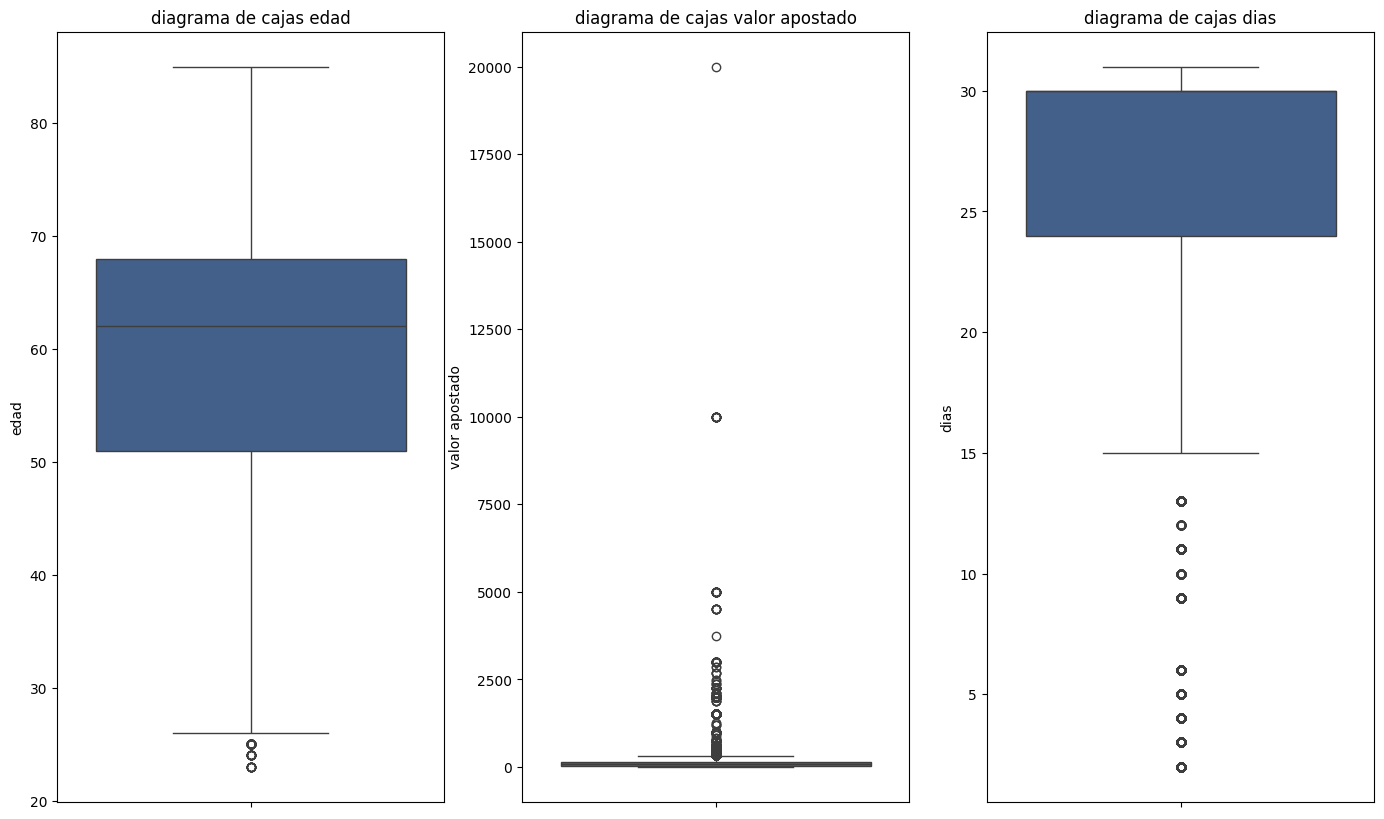

In [21]:
plt.figure(figsize=(17,10))
plt.subplot(131)
sns.boxplot(df["EDAD"],palette=Supergiros_palette)
plt.title("diagrama de cajas edad")
plt.ylabel("edad")
plt.subplot(132)
sns.boxplot(df["VALORAPOSTADO"],palette=Supergiros_palette)
plt.title("diagrama de cajas valor apostado")
plt.ylabel("valor apostado")
plt.subplot(133)
sns.boxplot(df["DIA"],palette=Supergiros_palette)
plt.title("diagrama de cajas dias")
plt.ylabel("dias")

En los graficos anteriores  observamos como las personas mayores son mas propensas a las juegos de apuestas pero a la vez hay gente joven jugando. En cuanto a los valores vemos que lo maximo apostado es de 20000 pesos colombianos pero este esta bastante alejado del resto de los valores apostados
 en cuanto a los dias  no hay mayor problema de los datos.
 para el valor apostado eliminamos los valores mayores a 5000 ya que no aportarian mucho al objetivo

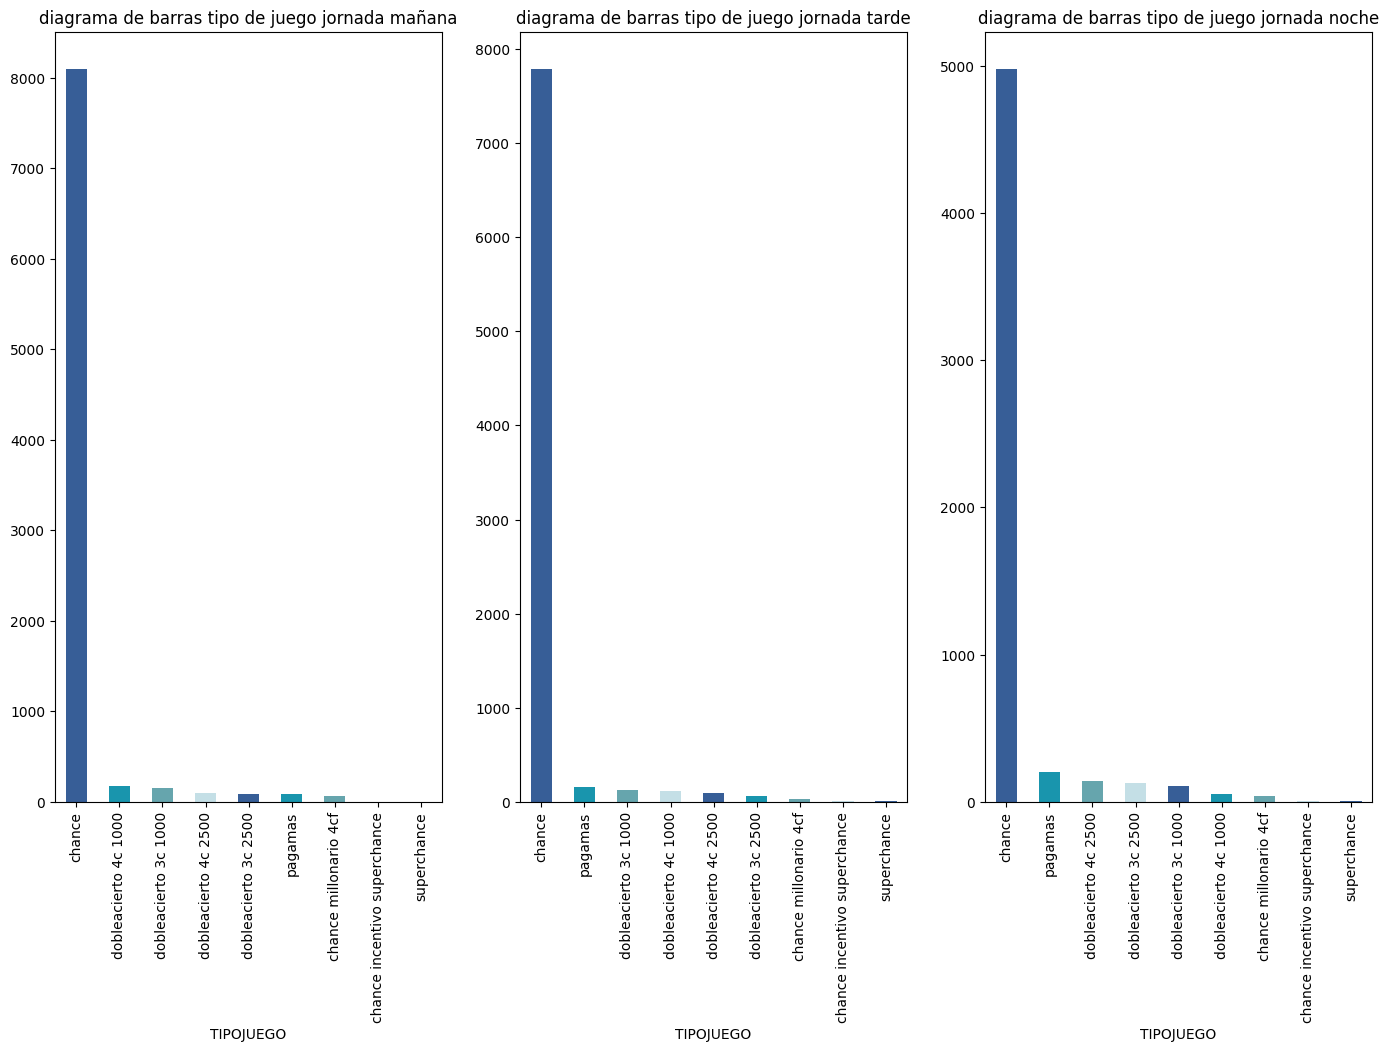

In [22]:
condicion1=df["JORNADA"]=="Mañana"
condicion2=df["JORNADA"]=="Tarde"
condicion3=df["JORNADA"]=="Noche"

plt.figure(figsize=(17,10))
plt.subplot(131)
conteo_jornada_manana=df["TIPOJUEGO"][condicion1].value_counts()
conteo_jornada_manana.plot(kind='bar',color=Supergiros_palette)
plt.title("diagrama de barras tipo de juego jornada mañana")
plt.subplot(132)
conteo_jornada_tarde=df["TIPOJUEGO"][condicion2].value_counts()
conteo_jornada_tarde.plot(kind='bar',color=Supergiros_palette)
plt.title("diagrama de barras tipo de juego jornada tarde")
plt.subplot(133)
conteo_jornada_tarde=df["TIPOJUEGO"][condicion3].value_counts()
conteo_jornada_tarde.plot(kind='bar',color=Supergiros_palette)
plt.title("diagrama de barras tipo de juego jornada noche")
plt.show()

segun los graficos anteriores vemos como en esta base de datos predomina el tipo de juego chance  a lo largo del dia

a continuacion visualizamos que genero apuesta mas

<ipython-input-23-e2dbe0001e29>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPOJUEGO', palette=Supergiros_palette)
<ipython-input-23-e2dbe0001e29>:2: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='TIPOJUEGO', palette=Supergiros_palette)


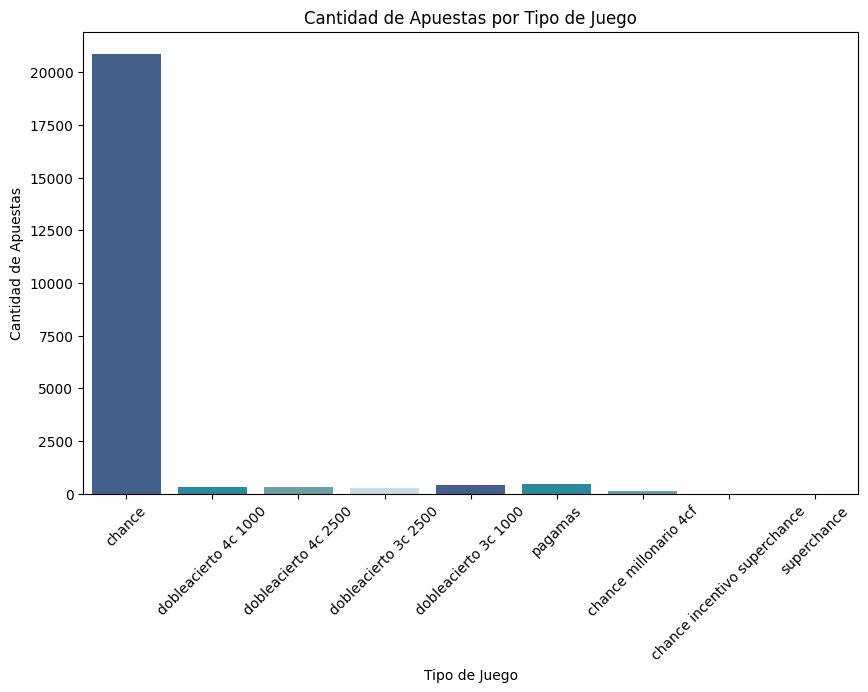

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIPOJUEGO', palette=Supergiros_palette)
plt.title('Cantidad de Apuestas por Tipo de Juego')
plt.xlabel('Tipo de Juego')
plt.ylabel('Cantidad de Apuestas')
plt.xticks(rotation=45)
plt.show()

diagrama de violín que muestra la distribución de los valores apostados por tipo de juego en el DataFrame

<ipython-input-24-f56e74daf4bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='TIPOJUEGO', y='VALORAPOSTADO', palette=Supergiros_palette)
<ipython-input-24-f56e74daf4bc>:2: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='TIPOJUEGO', y='VALORAPOSTADO', palette=Supergiros_palette)


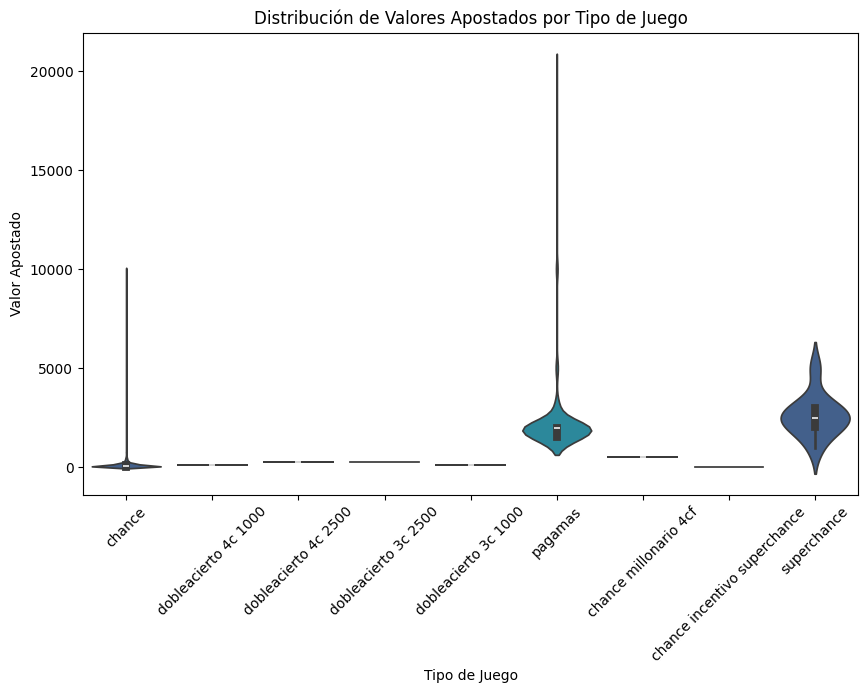

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='TIPOJUEGO', y='VALORAPOSTADO', palette=Supergiros_palette)
plt.title('Distribución de Valores Apostados por Tipo de Juego')
plt.xlabel('Tipo de Juego')
plt.ylabel('Valor Apostado')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

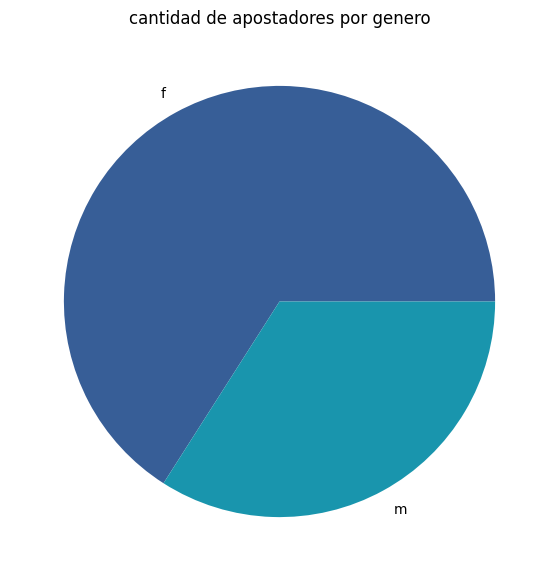

In [25]:
condicion4=df["GENERO"].value_counts()

plt.figure(figsize=(7,7))
colors1 = sns.color_palette(Supergiros_palette)
plt.pie(condicion4,labels={"m","f"},colors=colors1)
plt.title("cantidad de apostadores por genero")
plt.show

Se crea un nuevo CVS con los datos limpios

In [79]:
df.head()

,MES,DIA,DANE,TIPOJUEGO,NOMBRE_LOTERIA,NOMBRE_MODALIDAD,NUMEROAPOSTADO,EDAD,GENERO,VALORAPOSTADO,JORNADA
0,1,30,nóvita,chance,huila,cuatro cifras directo,3333,59,f,60,Mañana
1,1,30,nóvita,chance,huila,cuatro cifras directo,9999,59,f,60,Mañana
2,1,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,1270,44,m,100,Mañana
3,1,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,1701,44,m,100,Mañana
4,1,30,quibdó,dobleacierto 4c 1000,cafetero dia,dobleacierto 4cif 1000,2009,44,m,100,Mañana


In [ ]:
df.to_csv('/content/datos_apuestas_limpio.csv', index=False)